In [1]:
user_data = sc.textFile("ml-100k/u.user")

In [2]:
user_fields = user_data.map(lambda line: line.split("|"))
num_users = user_fields.map(lambda fields: fields[0]).count()
num_genders = user_fields.map(lambda fields: fields[2]).distinct().count()
num_occupations = user_fields.map(lambda fields: fields[3]).distinct().count()
num_zipcodes = user_fields.map(lambda fields: fields[4]).distinct().count()
print "Users: %d, genders: %d, occupations: %d, ZIP codes: %d" % (num_users, num_genders, num_occupations, num_zipcodes)

Users: 943, genders: 2, occupations: 21, ZIP codes: 795


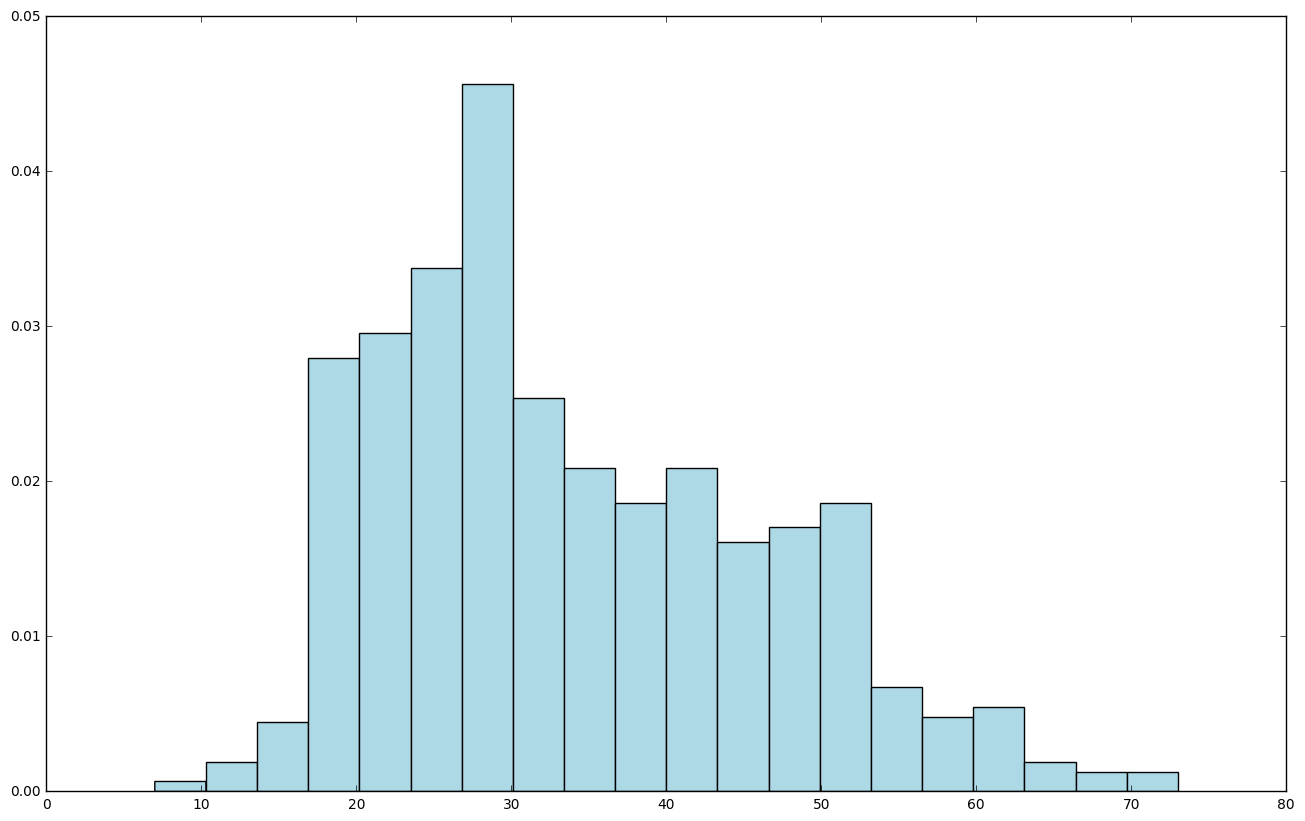

In [3]:
import matplotlib.pyplot as plt

ages = user_fields.map(lambda x: int(x[1])).collect()
plt.hist(ages, bins=20, color='lightblue', normed=True)
fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.show()

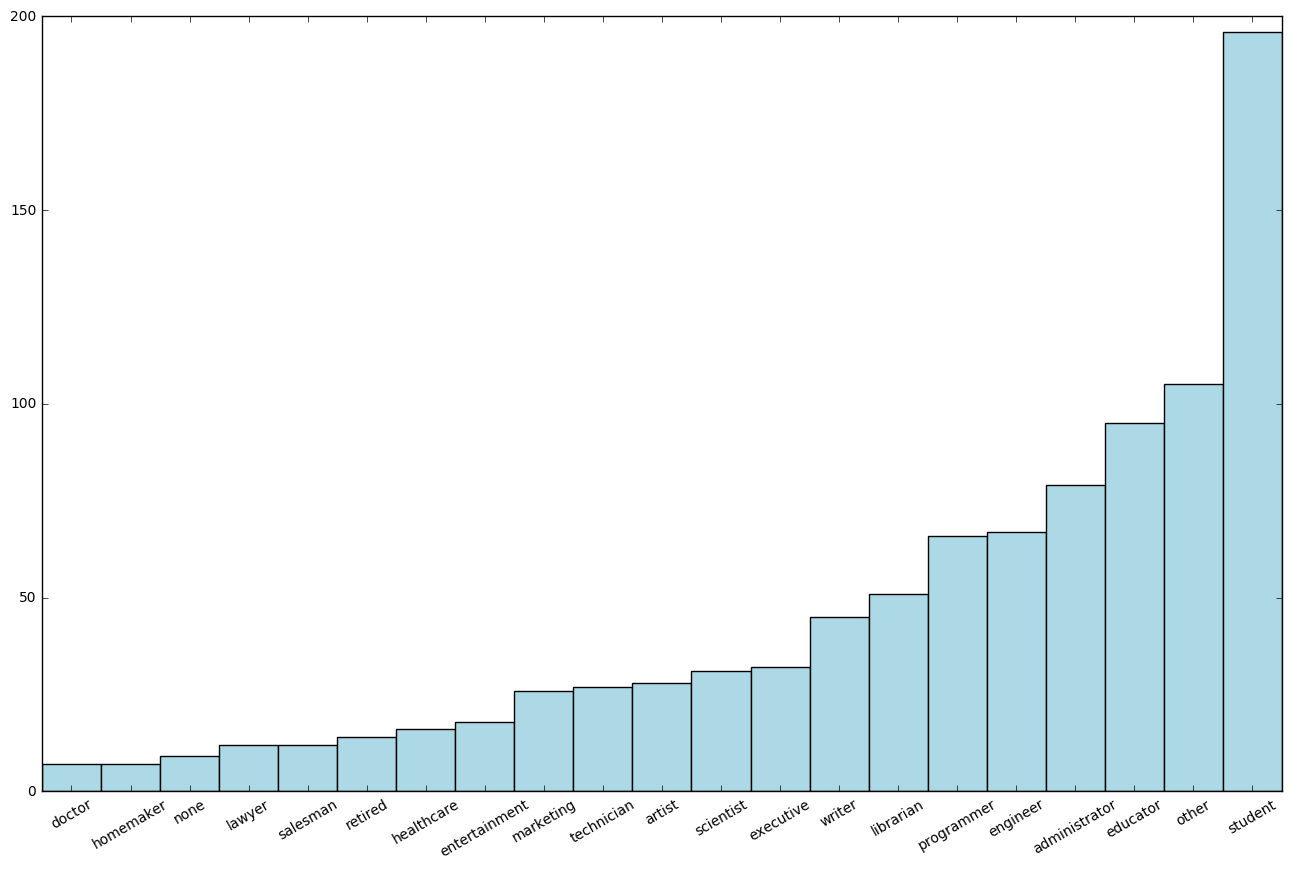

In [4]:
import numpy as np

count_by_occupation = user_fields.map(lambda fields: (fields[3], 1)).reduceByKey(lambda x, y: x + y).collect()
x_axis1 = np.array([c[0] for c in count_by_occupation])
y_axis1 = np.array([c[1] for c in count_by_occupation])

x_axis = x_axis1[np.argsort(y_axis1)]
y_axis = y_axis1[np.argsort(y_axis1)]

pos = np.arange(len(x_axis))
width = 1.0

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x_axis)

plt.bar(pos, y_axis, width, color='lightblue')
plt.xticks(rotation=30)
fig = plt.gcf()
fig.set_size_inches(16, 10)

plt.show()

In [5]:
count_by_occupation2 = user_fields.map(lambda fields: fields[3]).countByValue()
print "Map-Reduce Approach:"
print dict(count_by_occupation2)
print ""
print "countByValue Approach:"
print dict(count_by_occupation)

Map-Reduce Approach:
{u'administrator': 79, u'retired': 14, u'lawyer': 12, u'healthcare': 16, u'marketing': 26, u'executive': 32, u'scientist': 31, u'student': 196, u'technician': 27, u'librarian': 51, u'programmer': 66, u'salesman': 12, u'homemaker': 7, u'engineer': 67, u'none': 9, u'doctor': 7, u'writer': 45, u'entertainment': 18, u'other': 105, u'educator': 95, u'artist': 28}

countByValue Approach:
{u'administrator': 79, u'writer': 45, u'retired': 14, u'lawyer': 12, u'doctor': 7, u'marketing': 26, u'executive': 32, u'none': 9, u'entertainment': 18, u'healthcare': 16, u'scientist': 31, u'student': 196, u'educator': 95, u'technician': 27, u'librarian': 51, u'programmer': 66, u'artist': 28, u'salesman': 12, u'other': 105, u'homemaker': 7, u'engineer': 67}


In [6]:
all_ocupations = user_fields.map(lambda fields: fields[3]).distinct().collect()
all_ocupations.sort()

idx = 0
all_ocupations_dict = {}
for o in all_ocupations:
    all_ocupations_dict[o] = idx
    idx += 1
#Try a few examples to see what "1-of-k" encoding is assigned
print "Encoding of 'doctor': %d" % all_ocupations_dict['doctor']
print "Encoding of 'programmer: %d" % all_ocupations_dict['programmer']

Encoding of 'doctor': 2
Encoding of 'programmer: 14


In [8]:
K = len(all_ocupations_dict)
binary_x = np.zeros(K)
k_programmer = all_ocupations_dict['programmer']
binary_x[k_programmer] = 1
print "Binary feature vector: %s" % binary_x
print "Lenght of binary vector: %d" % K

Binary feature vector: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.]
Lenght of binary vector: 21
